# Representing Position and Orientation

Aqui tem varias coisas: https://petercorke.github.io/spatialmath-python/func_quat.html

In [ ]:
import numpy as np
from math import pi
from spatialmath import *

import ipywidgets as widgets
import matplotlib.pyplot as plt

: 

## Representing Orientation in 2-Dimensions

- Represents a translation of (1, 2) and a rotation of 30°

In [10]:
T1 = SE2(1, 2, 30*pi/180)
T1

   0.866    -0.5       1         
   0.5       0.866     2         
   0         0         1         


- Relative pose which is a displacement of (2, 1) and zero rotation

In [11]:

T2 = SE2(2, 1, 0)
T2

   1         0         2         
   0         1         1         
   0         0         1         


- Compose the two relative poses

In [12]:

T3 = T1*T2
T3

   0.866    -0.5       2.232     
   0.5       0.866     3.866     
   0         0         1         


- Compose the two relative poses
- Non-commutativity of composition is clearly demonstrated by:

In [9]:

T4 = T2*T1
T4

   0.866    -0.5       3         
   0.5       0.866     3         
   0         0         1         


- Plot poses

<Figure size 432x288 with 0 Axes>

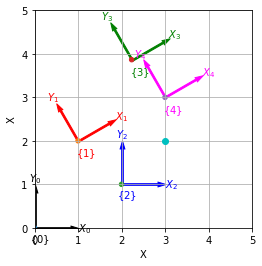

In [31]:
# create a new figure
plt.figure() 
SE2().plot(frame='0', dims=[0,5], color='black')
T1.plot(frame='1', dims=[0,5], color='red')
T2.plot(frame='2', dims=[0,5], color='blue')
T3.plot(frame='3', dims=[0,5], color='green')
T4.plot(frame='4', dims=[0,5], color='magenta')
plt.grid(True)

# define a point (3, 2) relative to the world frame
P = [3, 2]
plt.plot(P[0], P[1], 'co')

In [51]:
# coordinate of the point with respect to {1}
P1 = T1.inv() * P
P1


array([[ 1.73205081],
       [-1.        ]])

In [52]:
#convert the Euclidean point to homogeneous form by appending a one
P1 = np.append(P1, 1)
P1

array([ 1.73205081, -1.        ,  1.        ])

- Achar solução

In [83]:
from spatialmath.base import *

# h2e -> homogeneous to euclidian
# e2h -> euclidian to homogeneous

#result is in Euclidean coordinates
#ERA PRA ISSO FUNCIONAR MAS NAO FUNCIONA PQ O T1 É DA CLASSE SE2
eucl = h2e(T1.inv() * e2h(P))
eucl


ValueError: bad operands

In [85]:
 homtrans( T1.inv(), P)

TypeError: @ only applies to pose composition

## Representing Orientation in 3-Dimensions

In [92]:
#elementary rotation matrices
R = rotx(pi/2)
R

#functions roty and rotzcompute Ry(θ) and Rz(θ) respectively

array([[ 1.000000e+00,  0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  6.123234e-17, -1.000000e+00],
       [ 0.000000e+00,  1.000000e+00,  6.123234e-17]])

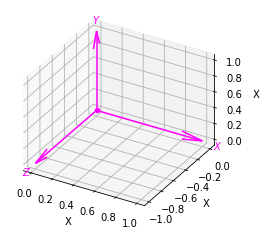

In [87]:
# the corresponding coordinate frame can be displayed graphically
trplot(R, 'magenta');

creating movie spin.mp4


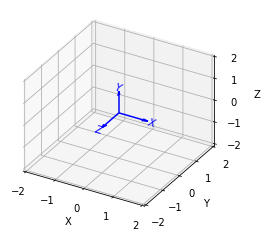

In [90]:
#We can visualize a rotation more powerfully using the 
# Toolbox function tranimate which animates a rotation

#Generates mp4 spin movie
tranimate(R, dims=[-2, 2], movie='spin.mp4')

In [91]:
# compounding of rotations
Rxy = np.dot(rotx(pi/2), roty(pi/2))
Rxy


array([[ 6.12323400e-17,  0.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  6.12323400e-17, -6.12323400e-17],
       [-6.12323400e-17,  1.00000000e+00,  3.74939946e-33]])

<Axes3DSubplot:xlabel='X', ylabel='X'>

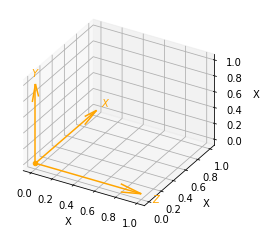

In [93]:
trplot(Rxy, 'orange')

<Axes3DSubplot:xlabel='X', ylabel='X'>

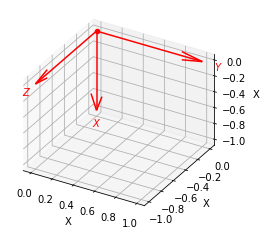

In [94]:
# non-commutativity of rotation shown
Ryx = np.dot(roty(pi/2), rotx(pi/2))
trplot(Ryx, 'red')

### Three-Angle Representations

The Euler angles are the 3-vector ¡ = (φ, θ, ψ).

In [95]:
#to compute the equivalent rotation matrix for T = (0.1, 0.2, 0.3) we write
R = np.dot(rotz(0.1), roty(0.2), rotz(0.3))
R

array([[ 0.97517033, -0.09983342,  0.19767681],
       [ 0.0978434 ,  0.99500417,  0.01983384],
       [-0.19866933,  0.        ,  0.98006658]])

In [96]:
# or more conveniently
R = eul2r(0.1, 0.2, 0.3)
R

array([[ 0.902113  , -0.38355704,  0.19767681],
       [ 0.3875172 ,  0.92164909,  0.01983384],
       [-0.18979606,  0.0587108 ,  0.98006658]])

In [97]:
#The inverse problem is finding the Euler angles that correspond to a given rotation matrix
gamma = tr2eul(R)
gamma


array([0.1, 0.2, 0.3])

However if θ is negative the inverse function returns a positive value for θ and quite different values for φ and ψ. However the corresponding rotation matrix is the same – the two different sets of Euler angles correspond to the one rotation matrix. The mapping from rotation matrix to Euler angles is not unique and always
returns a positive angle for θ

The roll-pitch-yaw sequence allows all angles to have arbitrary sign and it has a singularity
when θp=±(pi/2)

In [98]:
R = rpy2r(0.1, 0.2, 0.3)
R

array([[ 0.93629336, -0.27509585,  0.21835066],
       [ 0.28962948,  0.95642509, -0.03695701],
       [-0.19866933,  0.0978434 ,  0.97517033]])

In [99]:
gamma = tr2rpy(R)
gamma

array([0.1, 0.2, 0.3])

### Two Vector Representation

- approach vector â = (ax, ay, az)
- orientation vector ô = (ox, oy, oz)

In [100]:
# These two unit vectors are sufficient to completely define the rotation matrix
a = np.array([1, 0, 0]).T
o = np.array([0, 1, 0]).T
oa2r(o, a)

array([[ 0., -0.,  1.],
       [ 0.,  1.,  0.],
       [-1.,  0.,  0.]])

### Rotation about an Arbitrary Vector

In [101]:
R = rpy2r(0.1 , 0.2, 0.3)

[theta, v] = tr2angvec(R)

#where theta is the amount of rotation and v is the vector around which the rotation occurs.
print('Theta: ', theta)
print('V: ', v)

Theta:  0.3655021863566987
V:  [0.18857511 0.58337798 0.79000605]


In [102]:
# Converting from angle and vector to a rotation matrix is 
# achieved using Rodrigues’ rotation formula

R = angvec2r((pi/2), [1, 0, 0])
R

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.11022302e-16, -1.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  1.11022302e-16]])

### Unit Quaternions

-> TEM QUE USAR A CLASSE UNIT QUATERNION E NAO QUATERNION

In [103]:
from spatialmath import UnitQuaternion as UQ

In [104]:
#The constructor converts the passed argument to a quaternion, for example
q = UQ(rpy2tr(0.1, 0.2, 0.3))
q


#tendi direito nao


 0.9363 << -0.2751,  0.2184,  0.0000 >>
 0.2896 <<  0.9564, -0.0370,  0.0000 >>
 0.1987 << -0.0978, -0.9752, -0.0000 >>
 0.0000 <<  0.0000,  0.0000,  1.0000 >>


In [105]:
# USANDO OUTRO EXEMPLO DE QUATERNION

q = UQ([1,2,3,4])
q

 0.1826 <<  0.3651,  0.5477,  0.7303 >>


In [106]:
q.norm()

0.9999999999999999

In [107]:
#Quaternion multiplication is invoked through the overloaded multiplication operator
q1 = q * q
q1

 0.9333 << -0.1333, -0.2000, -0.2667 >>


In [108]:
#inversion, the quaternion conjugate, is
q.inv()

 0.1826 << -0.3651, -0.5477, -0.7303 >>


In [109]:
#Multiplying a quaternion by its inverse
q*q.inv()

 1.0000 <<  0.0000,  0.0000,  0.0000 >>


In [110]:
# or
q/q

 1.0000 <<  0.0000,  0.0000,  0.0000 >>


In [111]:
#The quaternion can be converted to an orthonormal rotation matrix by
q.R

array([[-0.66666667,  0.13333333,  0.73333333],
       [ 0.66666667, -0.33333333,  0.66666667],
       [ 0.33333333,  0.93333333,  0.13333333]])

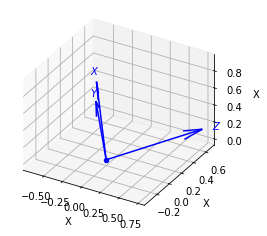

In [112]:
#plot the orientation represented by a quaternion
q.plot()

In [113]:
#vector is rotated by a quaternion using the overloaded multiplication operator
q*np.array([1, 0, 0]).T

array([-0.66666667,  0.66666667,  0.33333333])

### Combining Translation and Orientation

In [114]:
# composition of transforms
T = np.dot(transl(1, 0, 0), trotx(pi/2), transl(0, 1, 0))
T

array([[ 1.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00],
       [ 0.000000e+00,  6.123234e-17, -1.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  1.000000e+00,  6.123234e-17,  0.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]])

<Axes3DSubplot:xlabel='X', ylabel='X'>

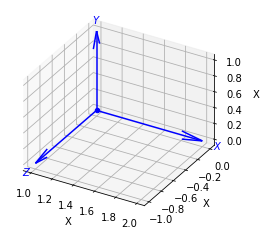

In [115]:
trplot(T)

In [116]:
#rotation matrix component of T is
t2r(T)

array([[ 1.000000e+00,  0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  6.123234e-17, -1.000000e+00],
       [ 0.000000e+00,  1.000000e+00,  6.123234e-17]])

In [117]:
#the translation component is a vector
transl(T).T

#FICOU DIFERENTE AAA

array([1., 0., 0.])

displays the orientation 'q' as a coordinate frame moving from the origin

In [2]:
import spatialmath
from spatialmath import UnitQuaternion as UQ


/Users/admin/opt/anaconda3/envs/motion_analysis/lib/python3.10/site-packages/matplotlib/animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


creating movie spin.mp4


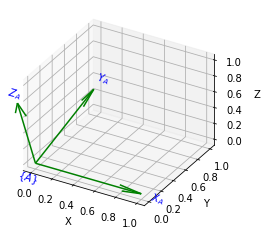

In [5]:
X = UQ.Rx(0.3)
X.animate(frame='A', color='green', movie='spin.mp4')
